# Classical Statistical Inference: Working with PDF and CDF

## Table of Content:

See [Basic-statistics_01.ipynb](Basic-statistics_01.ipynb) for a recap of the basic probability concepts. 
- I.6 [Working with pdf and CDF](#I.6-Working-with-pdf-and-CDF)
    * I.6.1 [Create and fit specific distributions](#I.6.1-Create-and-fit-specific-distributions:)
    * I.6.2 [Calculate statistical quantities associated to a distribution](#I.6.2-Calculate-statistical-quantities-associated-to-a-distribution)
    * I.6.3 [Clone an arbitrary distribution with Monte-Carlo method](#I.6.3-Clone-arbitrary-distribution-using-Monte-Carlo-method:)

- X. [References and supplementary material](#X)

In [1]:
# Modules to be used in this notebook
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

### I.6 Working with pdf and CDF 

In scipy.stats, there are classes for many distributions, which have methods that can very useful to study pdf! 

#### I.6.1 Create and fit specific distributions:

For example, to produce an instance of a normal distribution with "frozen" parameters (for example, let's consider mean=2, standard deviation=4), you can just do:

In [2]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = scipy.stats.norm(2, 4)   # THis create an instance of a normal distribution with (mu, sigma) = (2, 4)

You can now use this distribution in various ways. For example, to plot the pdf and cdf, you can do this:

Text(0.5, 1.0, 'CDF')

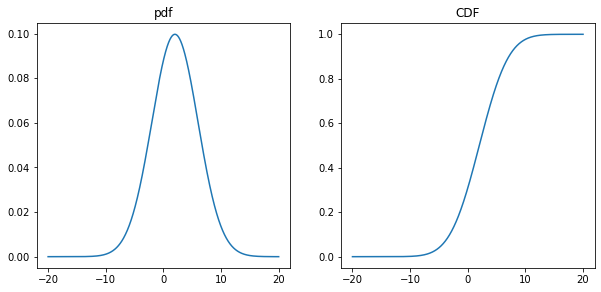

In [3]:
## define some x coordinates
x = np.linspace(-20, 20, 2000)

## make a figure
fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,4.5))
ax.plot(x, n.pdf(x))
ax.set_title("pdf")

ax2.plot(x, n.cdf(x))
ax2.set_title("CDF")

# Note, this example is adapted from Daniela Huppenkothen and Fernando Perez 
# https://github.com/dhuppenkothen/ClassicalStatsPython

It is also possible with `scipy.stats` to  fit a distribution to a data sample:

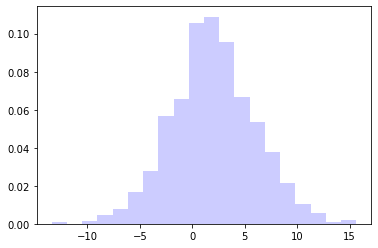

In [10]:
## now fit a normal distribution to the sample with the 
## fit method of the norm class

# Let's create a fake sample of 1000 data points drawn from a notmal distribution 
# instead you could read a data file with the sample you want to analyse 
sample = np.random.normal( 2, 4, 1000)    
# Let's visualise the histogram with our data sample 
mydata_hist = plt.hist(sample, bins=20, color='blue', alpha=0.2, density=True)

In [11]:
# Now, we FIT a normal PDF on the distribution of data points   
fitpdf_mean, fitpdf_sigma = scipy.stats.norm.fit(sample)   

In [12]:
fitpdf_mean, fitpdf_sigma 

(2.0163781237975327, 3.9858813722468645)

The fit parameter for the mean of the distribution is: 2.0164
The fit parameter for the standard deviation of the distribution is: 3.9859


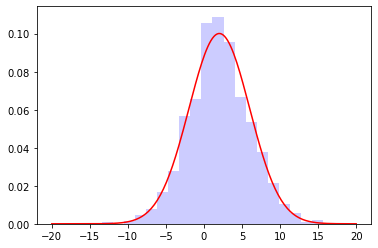

In [13]:
# Now, we FIT a normal PDF on the distribution of data points   
fitpdf_mean, fitpdf_sigma = scipy.stats.norm.fit(sample)   

# Let's plot (again) the histogram of the data 
mydata_hist = plt.hist(sample, bins=20, color='blue', alpha=0.2, density=True)
# Let's now plot the data histogram and overplot in red the gaussian PDF we fitted above
x = np.linspace(-20, 20, 200)  # Grid over which I want to evaluate the fitted PDF
pdf_fit = scipy.stats.norm.pdf(x, loc=fitpdf_mean, scale=fitpdf_sigma)   # Let's generate an instance of PDF with the fitted parameters 
plt.plot(x, pdf_fit, color='red')

# Let's visualise the fitted parameters of the fitted PDF
print("The fit parameter for the mean of the distribution is: %.4f"%fitpdf_mean)
print("The fit parameter for the standard deviation of the distribution is: %.4f"%fitpdf_sigma)

Note that the `fit` method does NOT work for discrete distributions.  

#### I.6.2 Calculate statistical quantities associated to a distribution 

You can also calculate various statistics associated to your function such as the mean, median, standard deviation, central moments, ... (see [Descriptive_statistics_01.ipynb](../03-Basic_statistics_and_proba_concepts/Descriptive_statistics_01.ipynb) for a recap of the definition of those quantities)

In [7]:
# Let's take a canonical normal distribution with (mu, sigma) = (0,1)
n = scipy.stats.norm(0, 1)
print('Mean = %.2f  ' %n.mean() )
print('Median = %.2f  ' %n.median() )
print('Stdev = %.2f  ' %n.std() )
print('Central moment of order 4 = %.2f' %n.moment(4) )

Mean = 0.00  
Median = 0.00  
Stdev = 1.00  
Central moment of order 4 = 3.00


You can also calculate the $p$ percentile of a function or "percent point function" or ppf (i.e. the inverse of the cdf): `scipy.stats.distrib.ppf(q)` 

In [5]:
print('q_25 and q_75 are %.3f , %.3f' %(n.ppf(0.25), n.ppf(0.75)) )
print('The interquartile range is %.3f' % (n.ppf(0.75)- n.ppf(0.25)) )

q_25 and q_75 are -0.674 , 0.674
The interquartile range is 1.349


Let's visualise what is this inter-quartile range. *Look at the code and figure* to ensure that you understand the relation between `ppf`, `cdf` and `pdf`.

(0, 0.5)

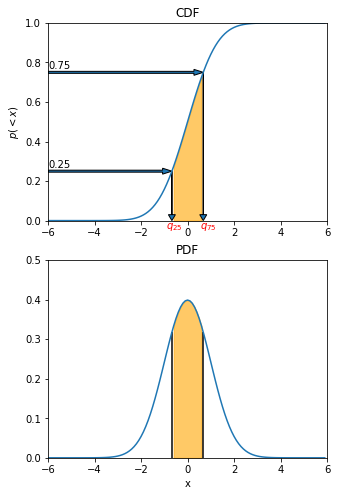

In [80]:
f, ax = plt.subplots(nrows=2, figsize=(5,8))
x = np.arange(-6,6,0.1)
ax[0].set_title('CDF')
ax[0].plot(x, n.cdf(x))

# The ppf is inverse of CDF => reads the function from y axis
# Draws 2 arrows from y=0.25 and y=0.75.  
# Definition of ax.arrow(): ax.arrow(x, y, dx, dy) 
ax[0].arrow(-6, 0.25, n.ppf(0.25)+6, 0., width=0.01, length_includes_head=True, head_length=0.4)
ax[0].arrow(-6, 0.75, n.ppf(0.75)+6, 0., width=0.01, length_includes_head=True, head_length=0.4)
ax[0].text(-6, 0.27, '0.25')
ax[0].text(-6, 0.77, '0.75')

# The ppf returns the x for which cdf(x = q_{25}) = 0.25 and  cdf(x = q_{75}) = 0.75 
q25, q75 = n.ppf(0.25), n.ppf(0.75)
ax[0].arrow(n.ppf(0.25), 0.25, 0, -0.25, width=0.01, length_includes_head=True, head_width=0.3, head_length=0.03)
ax[0].arrow(n.ppf(0.75), 0.75, 0, -0.75, width=0.01, length_includes_head=True, head_width=0.3, head_length=0.03)
ax[0].text(0.54, -0.04, '$q_{75}$', color='red' )
ax[0].text(-0.94, -0.04, '$q_{25}$', color='red' )
ax[0].fill_between(x[id25:id75], n.cdf(x[id25:id75]), 0, color='orange', alpha=0.6)

ax[0].set_ylabel('$p(<x)$')

ax[1].plot(x, n.pdf(x))
ax[1].set_title('PDF')
ax[1].set_xlabel('x')

# Let's plot 2 vertical line and color the area corresponding to the interquartile 
ax[1].vlines(q25, 0, n.pdf(q25))
ax[1].vlines(q75, 0, n.pdf(q75))
id25, id75 = np.searchsorted(x, q25), np.searchsorted(x, q75)
ax[1].fill_between(x[id25:id75], n.pdf(x[id25:id75]), 0, color='orange', alpha=0.6)

qq = [ax[i].set_xlim(-6,6) for i in range(2)]
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,0.5)

The region delimited by the 2 vertical black lines on the bottom pannel corresponds to the interquartile range. The orange area covered in the pdf is 50% of the surface covered by the PDF, which means that 50% of the total probability is in that range. The $q_{25}, q_{50}, q_{75}$ quartiles divide the sample into 4 equally probable samples. There is 25% probability for a value $X$ to be $X < q_{25}$, or 25% probability for a value $X$ to be $X > q_{75}$. 

#### I.6.3 Generate random samples / Monte-Carlo methods: 

It is common in science that you will have to *simulate* data, either to test an algorithm that you have written (e.g. to automatically identify a specific type of objects in an image, to test the ability of your code to detect a weak signal when the signal to noise is small, ...), or to study data errors.        

Let's first see how to generate samples in such a way that their distribution follow a known distribution (check [Descriptive_statistics_02.ipynb](../03-Basic_statistics_and_proba_concepts/Descriptive_statistics_02.ipynb) for an overview of common PDF encountered in science). The distributions in `scipy.stats` (e.g. `scipy.stats.norm` or `scipy.stats.uniform`) each have a method called `rvs` which implements a pseudo random sample from the distribution. This is extremely useful if you want to generate synthetic data (also called "mock data") that follow a specific distribution. This can e.g. be used to generate noise following a specific distribution to be added onto a synthetic data set. 

Here is an example generating a mock sample drawn from a uniform distribution:

$$
p(x \, | \, \mu, W) = \frac{1}{W} ~ \mathrm{for}~|x-\mu| \leq \frac{W}{2}, ~\mathrm{and~0~otherwise}
$$

Text(0,0.5,'$p(x) \\rm{d}x$')

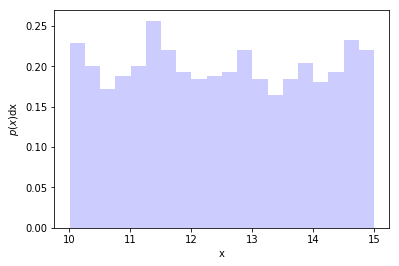

In [81]:
uni = scipy.stats.uniform(10, 5)   # First argument, i.e. 10, is the left edge, second is width
uni_sample = uni.rvs(1000)
qq = plt.hist(uni_sample, bins=20, color='blue', alpha=0.2, normed=True)
plt.xlabel('x')
plt.ylabel(r'$p(x) \rm{d}x$')

**Question:** Do you understand the values on $y$ scale ? 

#### I.6.4 Clone arbitrary distribution using Monte-Carlo method:
    
In the case of one dimensional distribution, it is pretty easy to generate a mock sample from an arbitrary distribution. This method, also called *transformation method*, makes use of the fact that to a given pdf $f(x)$ is associated a CDF $F(x)$. The CDF, $F(x)$ provides, for each value of $x_i$, the probability that $p(x < x_i)$, and we have $0 < p(x < x_i) < 1$. One can read the CDF the other way around (i.e. take the inverse of the CDF) to generate a random sample from a specific distribution (this is in fact the method used by `scipy.stats.distribution.rvs()` to generate a data sample following a given distribution). For this purpose, one generates a uniform sample of $y$, with $0 < y < 1$, and reads on the corresponding values $x'$. 

The following figure illustrates the concept of cloning an arbitrary 1-D distribution. It implies first to construct the CDF from the observed data and then possibly build a look-up table or model the cdf analytically. See the [source code](http://www.astroml.org/book_figures/chapter3/fig_clone_distribution.html) to better understand the procedure. 

![Fig_3_25](../Figures/fig_3_25_astroML_clone_distrib.png)


In case of multi-variate distribution, things can be more complicated, unless the distribution can be separated into a product of independant 1-D distributions. We refer to our reference [book](#book) (sect. 3.7, 6.3.2) for discussion about the strategies to adopt in such situations. 

## Summary. 

In this Notebook, we have learned: 

- How to define a specific distribution with `scipy.stats` and fit an functional pdf to a data sample `scipy.stats.distribution_of_interest.fit(sample)`. 
- That for distributions defined in `scipy.stats`, there are functions (methods) associated to the distribution that allow to access characteristic quantities associated to a distribution, such as its `mean()`, `median()`, `std()`, `moment()`. If `n = scipy.stats.norm(0,1)`, then the mean `mu = n.mean()`, standard deviation `sigma = n.std()`, etc
- How to calculate for which $x_i$, one has $p( < x_i) = P$, where $P$ is a specific value of the probability.  For this, one uses the *percent point function* `ppf` that is the inverse of the `cdf` and shown how to use it to calculate an interquartile range. For `n = scipy.stats.norm(0,1)`, the ppf is obtained with `n.ppf()`. 
- How to generate a random sample of data points that follows a specific distribution. The function `rvs` (for random values sample). The creation of a random sample of datas inters into what one calls *Monte Carlo Methods*. 

## X. References and supplementary material: <a class="anchor" id="X"></a>

* **Chapter 1** (1.2), **Chapter 3** (3.1, 3.2) and **Chapter 4** (4.1 to 4.3) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* *All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/).  

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 2**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**, **Chapter 18.7** 

